#  SY Bus ridership Activity and Weather Conditions

Submitted by: Swamini Satish Bhoir

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import requests
from zipfile import ZipFile
import matplotlib.pyplot as plt 
np.set_printoptions(precision=4)
pd.options.display.max_rows = 20
import datetime as dt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Loading data sets

## Bus ridership data sets

In [2]:
#Defining location of a datasets
#Bus Activity SY36 2019
fileBA2019="~/datasets/ist652/Buses/BusActivity_SY36_2019.zip"

#Bus Activity SY36 2020
fileBA2020="~/datasets/ist652/Buses/BusActivity_SY36_2020.zip"

#Syracuse Weather data 2019
fileSyrW2019="~/datasets/ist652/Buses/syracuse_2019_weather.csv"

In [3]:
#Loading 2019 bus route SY36 dataset into Jupyter environment - a security warning will appear. You can ignore it.
#Be patient - it could take up to 2 minutes for the dataset to become available

#Dataframe with bus activity data for 2019 for route SY36 is named data2019
data2019=pd.read_csv(fileBA2019)


In [4]:
#Loading 2020 bus route SY36 dataset into Jupyter environment - a security warning will appear. You can ignore it.
#Be patient - it could take up to 2 minutes for the dataset to become available

#Dataframe with bus activity data for 2020 for route SY36 is named data2020
data2020=pd.read_csv(fileBA2020)

In [5]:
#Drop some columns that won't be needed
data2019.drop(['SURVEY_DATE','VEHICLE_DESCRIPTION','GARAGE_NAME','DIVISION_NAME','COMMENTS','WHEELCHAIRS','MODIFIED'],axis=1,inplace=True)
data2020.drop(['SURVEY_DATE','VEHICLE_DESCRIPTION','GARAGE_NAME','DIVISION_NAME','COMMENTS','WHEELCHAIRS','MODIFIED'],axis=1,inplace=True)

In [6]:
data2019.head()

,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TRIP_START_TIME,TIME_PERIOD,...,DWELL_TIME,RUNNING_TIME_ACTUAL,PASSENGERS_ON,PASSENGERS_OFF,PASSENGERS_IN,TIMEPOINT_MILES,FIRST_LAST_STOP,UNIQUE_ID,stop_lat,stop_lon
0,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,NaN,5.483,8,0,8,0.413,1,37100000002,43.043656,-76.150963
1,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,NaN,0,0,8,NaN,2,37100000003,43.044280,-76.147495
2,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,2.550,0,0,8,0.716,2,37100000005,43.045336,-76.147419
3,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,NaN,0,0,8,NaN,2,37100000006,43.047959,-76.147440
4,2604260,295,Sep18 (Holiday),180900591,371,SY36,FROM HUB,[Sy36]Outbound 136 no plazas,2019-01-01 07:40:00.000000,AM Peak,...,0.0,NaN,0,0,8,NaN,2,37100000007,43.049554,-76.148697


In [7]:
data2020.head()

,SERIAL_NUMBER,SCHEDULE_ID,SCHEDULE_NAME,PATTERN_ID,ROUTE_NUMBER,ROUTE_NAME,DIRECTION_NAME,BRANCH,TRIP_START_TIME,TIME_PERIOD,...,DWELL_TIME,RUNNING_TIME_ACTUAL,PASSENGERS_ON,PASSENGERS_OFF,PASSENGERS_IN,TIMEPOINT_MILES,FIRST_LAST_STOP,UNIQUE_ID,stop_lat,stop_lon
0,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,NaN,5.533,9,0,9,0.417,1,37100000002,43.043656,-76.150963
1,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.00,NaN,0,0,9,NaN,2,37100000003,43.044280,-76.147495
2,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.00,4.200,0,0,9,0.705,2,37100000005,43.045336,-76.147419
3,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.00,NaN,0,0,9,NaN,2,37100000006,43.047959,-76.147440
4,3286134,314,Dec19 (Holiday),191200591,371,SY36,FROM HUB,[sy36]Outbound 136 no plazas,2020-01-01 07:40:00.000000,AM Peak,...,0.12,NaN,1,0,10,NaN,2,37100000007,43.049554,-76.148697


In [8]:
data2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980551 entries, 0 to 980550
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SERIAL_NUMBER        980551 non-null  int64  
 1   SCHEDULE_ID          980551 non-null  int64  
 2   SCHEDULE_NAME        980551 non-null  object 
 3   PATTERN_ID           980551 non-null  int64  
 4   ROUTE_NUMBER         980551 non-null  int64  
 5   ROUTE_NAME           980551 non-null  object 
 6   DIRECTION_NAME       980551 non-null  object 
 7   BRANCH               980551 non-null  object 
 8   TRIP_START_TIME      980551 non-null  object 
 9   TIME_PERIOD          980551 non-null  object 
 10  SERVICE_PERIOD       980551 non-null  object 
 11  TRIP_NUMBER          980551 non-null  int64  
 12  TRIP_KEY             980551 non-null  int64  
 13  BLOCK_NUMBER         980551 non-null  int64  
 14  BLOCK_KEY            980551 non-null  int64  
 15  BLOCK_NAME       

In [9]:
data2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962566 entries, 0 to 962565
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   SERIAL_NUMBER        962566 non-null  int64  
 1   SCHEDULE_ID          962566 non-null  int64  
 2   SCHEDULE_NAME        962566 non-null  object 
 3   PATTERN_ID           962566 non-null  int64  
 4   ROUTE_NUMBER         962566 non-null  int64  
 5   ROUTE_NAME           962566 non-null  object 
 6   DIRECTION_NAME       962566 non-null  object 
 7   BRANCH               962566 non-null  object 
 8   TRIP_START_TIME      962566 non-null  object 
 9   TIME_PERIOD          962566 non-null  object 
 10  SERVICE_PERIOD       962566 non-null  object 
 11  TRIP_NUMBER          962566 non-null  int64  
 12  TRIP_KEY             962566 non-null  int64  
 13  BLOCK_NUMBER         962566 non-null  int64  
 14  BLOCK_KEY            962566 non-null  int64  
 15  BLOCK_NAME       

## 2019 Syracuse weather data

In [10]:
#Loading Syracuse Weather dataset into Jupyter environment 
weather2019=pd.read_csv(fileSyrW2019)

In [11]:
weather2019.head()

,STATION,NAME,DATE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN
0,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/1/2019,15.66,0.02,0.0,40,53,21
1,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/2/2019,5.14,0.00,0.0,24,31,18
2,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/3/2019,10.74,0.09,0.3,33,37,30
3,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/4/2019,4.70,0.00,0.0,36,49,25
4,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",1/5/2019,5.59,0.00,0.0,33,44,25


In [12]:
weather2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  365 non-null    object 
 1   NAME     365 non-null    object 
 2   DATE     365 non-null    object 
 3   AWND     365 non-null    float64
 4   PRCP     365 non-null    float64
 5   SNOW     365 non-null    float64
 6   TAVG     365 non-null    int64  
 7   TMAX     365 non-null    int64  
 8   TMIN     365 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 25.8+ KB


# Exam task solutions

Add the text/code/visualizations for your exam tasks solutions from this point onwards. Use as many additional cells as required. Please place long textual explanations or analysis in their own markdown cells, not as comments inside your code cells.

## TASK 0

**TEAM 2 - NYC TAXI ANALYSIS**  
*Green Taxis cover a very limited amount of fares late at night, indicating that customers prefer to pre-book their cabs for safety reasons.  
Trips that take place early in the morning cover more distances than those that take place later in the day.  
The majority of rides last between 0 and 2 miles.*

In [13]:
# Dropping all the null values from the data2019 dataset. All the null values were in the 'SCHEDULED_TIME' column.
newdata2019 = data2019.dropna()
newdata2019.shape

(74291, 40)

In [14]:
newdata2020 = data2020.dropna()
newdata2020.shape

(11425, 40)

## TASK 1

In [15]:
newdata2019['TRIP_DATE'] = pd.to_datetime(newdata2019['TRIP_START_TIME']).dt.date

Creating dataset with only required columns

In [16]:
task1 = newdata2019[['TRIP_START_TIME','STOP_ID','PASSENGERS_ON']]
task1

,TRIP_START_TIME,STOP_ID,PASSENGERS_ON
2,2019-01-01 07:40:00.000000,6766,0
7,2019-01-01 07:40:00.000000,9863,0
11,2019-01-01 07:40:00.000000,10405,0
24,2019-01-01 07:40:00.000000,10245,1
129,2019-01-01 08:15:00.000000,7866,0
...,...,...,...
980507,2019-12-31 17:20:00.000000,1114,1
980526,2019-12-31 17:20:00.000000,7866,0
980538,2019-12-31 17:20:00.000000,7870,1
980542,2019-12-31 17:20:00.000000,12669,0


Creating new column from existing column to show dates

In [17]:
task1['DATE'] = pd.to_datetime(task1['TRIP_START_TIME']).dt.date

In [18]:
task1

,TRIP_START_TIME,STOP_ID,PASSENGERS_ON,DATE
2,2019-01-01 07:40:00.000000,6766,0,2019-01-01
7,2019-01-01 07:40:00.000000,9863,0,2019-01-01
11,2019-01-01 07:40:00.000000,10405,0,2019-01-01
24,2019-01-01 07:40:00.000000,10245,1,2019-01-01
129,2019-01-01 08:15:00.000000,7866,0,2019-01-01
...,...,...,...,...
980507,2019-12-31 17:20:00.000000,1114,1,2019-12-31
980526,2019-12-31 17:20:00.000000,7866,0,2019-12-31
980538,2019-12-31 17:20:00.000000,7870,1,2019-12-31
980542,2019-12-31 17:20:00.000000,12669,0,2019-12-31


Groupping by STOP_ID to show how many people board from particular stop and then calculating the average number of people boarding from a particular stop

In [19]:
passperstop = pd.DataFrame(task1.groupby(['STOP_ID'])['PASSENGERS_ON'].sum())
passperstop['PASSENGERS_ON'] =  passperstop['PASSENGERS_ON']/365
passperstop.sort_values(by=['PASSENGERS_ON'],ascending = False)

,PASSENGERS_ON
STOP_ID,
3761,24.501370
1114,15.134247
7866,9.926027
727,7.468493
6766,5.394521
...,...
17661,0.136986
7224,0.126027
735,0.106849


### SUBTASK 1.3

Below are the Bus stops which have highest average number of daily passengers during the year 2019

In [20]:
passperstop.sort_values(by=['PASSENGERS_ON'],ascending = False).head(5)

,PASSENGERS_ON
STOP_ID,
3761,24.501370
1114,15.134247
7866,9.926027
727,7.468493
6766,5.394521


In [21]:
passperstop['DATE'] = task1['DATE']
weather2019['DATE'] = pd.to_datetime(weather2019['DATE']).dt.date

Merging the weather data and bus data to see how weather conditions affect the number of passengers boarding the bus from a particular stop.

In [22]:
mergeddata1 = pd.merge(newdata2019, weather2019, how = 'left',left_on = ['TRIP_DATE'], right_on=['DATE'] )

### SUBTASK 1.1

Chose STOP_ID = 1114 for analysing passengers on vs weather conditions

In [23]:
filter = mergeddata1["STOP_ID"]==1114
stopid1114 = mergeddata1.where(filter)
stopid1114.dropna(inplace = True)

In [24]:
newstopid1114 = stopid1114[['TRIP_DATE','PASSENGERS_ON','TAVG','SNOW','AWND','PRCP']]
newstopid1114

,TRIP_DATE,PASSENGERS_ON,TAVG,SNOW,AWND,PRCP
12,2019-01-01,0.0,40.0,0.0,15.66,0.02
13,2019-01-01,1.0,40.0,0.0,15.66,0.02
22,2019-01-01,0.0,40.0,0.0,15.66,0.02
25,2019-01-01,1.0,40.0,0.0,15.66,0.02
30,2019-01-01,1.0,40.0,0.0,15.66,0.02
...,...,...,...,...,...,...
74263,2019-12-31,0.0,37.0,0.4,8.72,0.15
74264,2019-12-31,2.0,37.0,0.4,8.72,0.15
74274,2019-12-31,0.0,37.0,0.4,8.72,0.15
74283,2019-12-31,0.0,37.0,0.4,8.72,0.15


***All the Weather Conditions are negatively corrleated to passegers boarded depicting that if there is more snow less people will travel from the bus and same is the case during rain, wind and high temperatues.***

<AxesSubplot:>

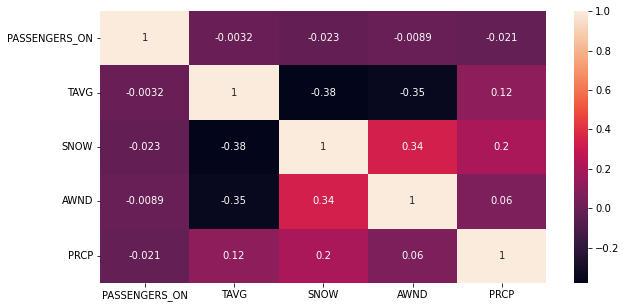

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(newstopid1114.corr(),annot=True)

Creating new column 'TRIP_MONTH' by extracting month from the date time column

In [26]:
newstopid1114 = pd.DataFrame(newstopid1114)
newstopid1114['TRIP_MONTH'] = pd.to_datetime(newstopid1114['TRIP_DATE']).dt.month
newstopid1114

,TRIP_DATE,PASSENGERS_ON,TAVG,SNOW,AWND,PRCP,TRIP_MONTH
12,2019-01-01,0.0,40.0,0.0,15.66,0.02,1
13,2019-01-01,1.0,40.0,0.0,15.66,0.02,1
22,2019-01-01,0.0,40.0,0.0,15.66,0.02,1
25,2019-01-01,1.0,40.0,0.0,15.66,0.02,1
30,2019-01-01,1.0,40.0,0.0,15.66,0.02,1
...,...,...,...,...,...,...,...
74263,2019-12-31,0.0,37.0,0.4,8.72,0.15,12
74264,2019-12-31,2.0,37.0,0.4,8.72,0.15,12
74274,2019-12-31,0.0,37.0,0.4,8.72,0.15,12
74283,2019-12-31,0.0,37.0,0.4,8.72,0.15,12


Grouping the passengers by month to see the passengers activity over the 2019 year

In [27]:
passpermonth = pd.DataFrame(newstopid1114.groupby(['TRIP_MONTH'], as_index=False)['PASSENGERS_ON'].sum())
passpermonth

,TRIP_MONTH,PASSENGERS_ON
0,1,591.0
1,2,588.0
2,3,50.0
3,7,625.0
4,8,695.0
5,9,707.0
6,10,831.0
7,11,696.0
8,12,741.0


In [28]:
weather2019['MONTH'] = pd.to_datetime(weather2019['DATE']).dt.month
weather2019

,STATION,NAME,DATE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,MONTH
0,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",2019-01-01,15.66,0.02,0.0,40,53,21,1
1,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",2019-01-02,5.14,0.00,0.0,24,31,18,1
2,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",2019-01-03,10.74,0.09,0.3,33,37,30,1
3,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",2019-01-04,4.70,0.00,0.0,36,49,25,1
4,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",2019-01-05,5.59,0.00,0.0,33,44,25,1
...,...,...,...,...,...,...,...,...,...,...
360,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",2019-12-27,10.74,0.00,0.0,47,55,39,12
361,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",2019-12-28,6.71,0.00,0.0,39,42,27,12
362,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",2019-12-29,7.83,0.29,0.0,32,37,25,12
363,USW00014771,"SYRACUSE HANCOCK INTERNATIONAL AIRPORT, NY US",2019-12-30,12.30,0.75,0.0,37,41,35,12


Grouping to see how is the overall temperature throughout the year

In [29]:
tavgpermonth = pd.DataFrame(weather2019.groupby('MONTH')['TAVG'].mean())
tavgpermonth

,TAVG
MONTH,
1,21.677419
2,26.071429
3,32.483871
4,47.866667
5,56.838710
6,66.633333
7,74.741935
8,69.548387
9,64.033333


The below data show  passengers activity on Stop 1114 throughout year with respect to average temperature.

In [30]:
passavgTemp = pd.merge(passpermonth, tavgpermonth, how = 'left',left_on = ['TRIP_MONTH'], right_on=['MONTH'] )
passavgTemp

,TRIP_MONTH,PASSENGERS_ON,TAVG
0,1,591.0,21.677419
1,2,588.0,26.071429
2,3,50.0,32.483871
3,7,625.0,74.741935
4,8,695.0,69.548387
5,9,707.0,64.033333
6,10,831.0,53.451613
7,11,696.0,36.466667
8,12,741.0,30.709677


***The below bar plot shows comparision of passengers boarding the bus vs the average temperature of that month. We can see that from July to September more passengers are boarding the bus this might be since during this time the temperature are high and hence people avoid walking in sun. I order to avoid sun burn or tanning.
In the month of march less people boarded this might be because of Spring break and hence people might be out of town.***

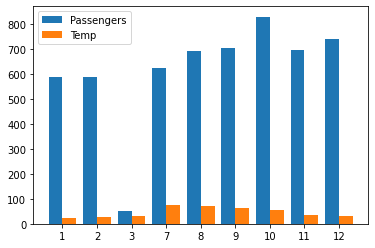

In [31]:
x_axis = np.arange(len(passavgTemp))
plt.bar(x_axis -0.2, passavgTemp['PASSENGERS_ON'], width=0.4, label = 'Passengers')
plt.bar(x_axis +0.2, passavgTemp['TAVG'], width=0.4, label = 'Temp')
plt.xticks(x_axis, passavgTemp['TRIP_MONTH'])
# Adding legend
plt.legend()
# Display
plt.show()

### SUBTASK 1.2

Creating new dataframe with different stop ids(3761 and 7866) to check passenger activities.

In [32]:
#3761 AND 7866
filter = newdata2019["STOP_ID"]==3761
stopid3761 = newdata2019.where(filter)
stopid3761.dropna(inplace = True)

In [33]:
stopid3761 = stopid3761[['TRIP_START_TIME','PASSENGERS_ON']]
stopid3761['MONTH'] = pd.to_datetime(stopid3761['TRIP_START_TIME']).dt.month
stopid3761 = stopid3761.drop(['TRIP_START_TIME'],axis=1)

The below dataframe shows passengers boarding throughout the year from 3761 stop

In [34]:
stopid3761 = stopid3761.groupby(['MONTH'], as_index=False)['PASSENGERS_ON'].sum()
stopid3761

,MONTH,PASSENGERS_ON
0,1,959.0
1,2,980.0
2,3,112.0
3,7,1136.0
4,8,1182.0
5,9,1073.0
6,10,1153.0
7,11,1089.0
8,12,1259.0


In [35]:
filter = newdata2019["STOP_ID"]==7866
stopid7866 = newdata2019.where(filter)
stopid7866.dropna(inplace = True)

In [36]:
stopid7866 = stopid7866[['TRIP_START_TIME','PASSENGERS_ON']]
stopid7866['MONTH'] = pd.to_datetime(stopid7866['TRIP_START_TIME']).dt.month
stopid7866 = stopid7866.drop(['TRIP_START_TIME'],axis=1)

The below dataframe shows passengers boarding throughout the year from 7866 stop

In [37]:
stopid7866 = stopid7866.groupby(['MONTH'], as_index=False)['PASSENGERS_ON'].sum()
stopid7866

,MONTH,PASSENGERS_ON
0,1,389.0
1,2,400.0
2,3,37.0
3,7,390.0
4,8,433.0
5,9,571.0
6,10,540.0
7,11,451.0
8,12,412.0


In [38]:
subtask12 = pd.merge(
    stopid3761,
    stopid7866,
    how="inner",
    on="MONTH")

***Below graph shows passengers boarding from two different stops. The passengers boarding from 3761 is high because this is CAMILLUS COMMONS stop and hence there are many apartments in this area and thus many people will board the bus from here.Stop 7866 is W GENESEE ST/MILTON AVE and not many houses/partments or any prime building is here hecne people people boarding.***

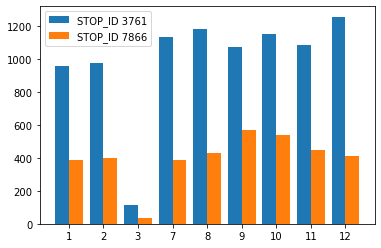

In [39]:
x_axis = np.arange(len(subtask12))
# Multi bar Chart
plt.bar(x_axis -0.2, subtask12['PASSENGERS_ON_x'], width=0.4, label = 'STOP_ID 3761')
plt.bar(x_axis +0.2, subtask12['PASSENGERS_ON_y'], width=0.4, label = 'STOP_ID 7866')
# Xticks
plt.xticks(x_axis, subtask12['MONTH'])
# Adding legend
plt.legend()
# Display
plt.show()

## TASK 3

In [40]:
#Creating a dataframe where only required columns are there
task3 = newdata2019[['TRIP_START_TIME','ROUTE_NUMBER','SEGMENT_MILES']]
task3

,TRIP_START_TIME,ROUTE_NUMBER,SEGMENT_MILES
2,2019-01-01 07:40:00.000000,371,0.174
7,2019-01-01 07:40:00.000000,371,0.107
11,2019-01-01 07:40:00.000000,371,0.082
24,2019-01-01 07:40:00.000000,371,0.119
129,2019-01-01 08:15:00.000000,371,0.152
...,...,...,...
980507,2019-12-31 17:20:00.000000,371,0.448
980526,2019-12-31 17:20:00.000000,371,0.152
980538,2019-12-31 17:20:00.000000,371,0.046
980542,2019-12-31 17:20:00.000000,371,0.066


In [41]:
#Converting 'TRIP_START_TIME' column to datee column
task3['TRIP_START_TIME'] = pd.to_datetime(task3['TRIP_START_TIME']).dt.date
task3

,TRIP_START_TIME,ROUTE_NUMBER,SEGMENT_MILES
2,2019-01-01,371,0.174
7,2019-01-01,371,0.107
11,2019-01-01,371,0.082
24,2019-01-01,371,0.119
129,2019-01-01,371,0.152
...,...,...,...
980507,2019-12-31,371,0.448
980526,2019-12-31,371,0.152
980538,2019-12-31,371,0.046
980542,2019-12-31,371,0.066


Calculating the total distance travelled by bus on particular day using the groupby function on 'TRIP_START_TIME'.
Then sorting the values in descending order to see what was the maximum distance that bus travelled and on which date.

In [42]:
disttravelled = task3.groupby('TRIP_START_TIME')['SEGMENT_MILES'].sum().reset_index()
disttravelled.sort_values('SEGMENT_MILES', ascending=False)

,TRIP_START_TIME,SEGMENT_MILES
175,2019-06-25,68.485
126,2019-05-07,65.662
114,2019-04-25,65.644
105,2019-04-16,65.516
120,2019-05-01,65.515
...,...,...
12,2019-01-13,7.800
26,2019-01-27,7.001
19,2019-01-20,5.275
4,2019-01-05,3.179


### SUBTASK 3.1

In [43]:
# Creating new column 'MONTH' for further analaysis
task3['TRIP_START_TIME'] = pd.to_datetime(task3['TRIP_START_TIME'])
task3['MONTH'] = task3['TRIP_START_TIME'].dt.month

In [44]:
# Calculating how much does it cost to run a bus on each month of the year which the metrics given in the question
mergemonth = task3.groupby('MONTH')['SEGMENT_MILES'].sum().reset_index()
mergemonth['PRICE'] = (mergemonth['SEGMENT_MILES']/7 )*3.60
mergemonth

,MONTH,SEGMENT_MILES,PRICE
0,1,781.760,402.048000
1,2,746.658,383.995543
2,3,1273.621,655.005086
3,4,1341.109,689.713200
4,5,1337.679,687.949200
5,6,1212.366,623.502514
6,7,860.440,442.512000
7,8,881.510,453.348000
8,9,818.766,421.079657
9,10,885.880,455.595429


***Ploting Month vs Price line chart to see month variation of how much price does it cause to run a bus.***  

From the graph we can see that the from February to May the cost to run bus was higher. Because at that time the miles covered by the bus were highest as comapred to other month. And also the fuel price also might have increase during these months.

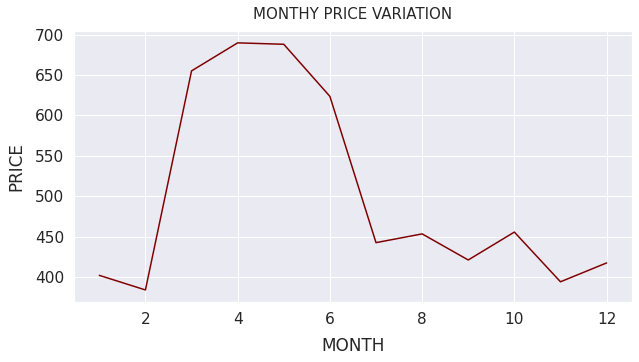

In [45]:
sns.set(font_scale=1.4)
mergemonth.set_index('MONTH')['PRICE'].plot(figsize=(10, 5), linewidth=1.5, color='maroon')
plt.xlabel("MONTH", labelpad=10)
plt.ylabel("PRICE", labelpad=10)
plt.title("MONTHY PRICE VARIATION", y=1.02, fontsize=15);

### SUBTASK 3.2

There are couple of days in the data2019 dataset where the distance travelled or the miles covered by the bus is abnormally low. See below for such dates. This reason of such low miles might be that the data did not capture the miles covered properly because this low miles just indicates that the bus just moved for parking or something else.

In [46]:
disttravelled.sort_values('SEGMENT_MILES', ascending=True).head(5)

,TRIP_START_TIME,SEGMENT_MILES
365,2020-01-01,0.792
4,2019-01-05,3.179
19,2019-01-20,5.275
26,2019-01-27,7.001
12,2019-01-13,7.800


## TASK 4  
Creating new dataframe where only required columns are there

In [47]:
task4 = newdata2019[['TIME_SCHEDULED','TIME_ACTUAL_ARRIVE','OPERATOR_ID','VEHICLE_NUMBER']]

Converting below columns to datetime datatype so that Time differecne can be calculated

In [48]:
task4['TIME_ACTUAL_ARRIVE'] = pd.to_datetime(task4['TIME_ACTUAL_ARRIVE'])
task4['TIME_SCHEDULED'] = pd.to_datetime(task4['TIME_SCHEDULED'])
task4['TIME_DIFF'] = task4['TIME_ACTUAL_ARRIVE'] - task4['TIME_SCHEDULED']

In [49]:
task4.head()

,TIME_SCHEDULED,TIME_ACTUAL_ARRIVE,OPERATOR_ID,VEHICLE_NUMBER,TIME_DIFF
2,2019-01-01 07:42:00,2019-01-01 07:44:22,408,1216,0 days 00:02:22
7,2019-01-01 07:45:00,2019-01-01 07:46:56,408,1216,0 days 00:01:56
11,2019-01-01 07:47:00,2019-01-01 07:48:32,408,1216,0 days 00:01:32
24,2019-01-01 07:55:00,2019-01-01 07:55:50,408,1216,0 days 00:00:50
129,2019-01-01 08:36:00,2019-01-01 08:39:01,408,1216,0 days 00:03:01


Creating new columns to store time difference in hours and in minutes value separately 

In [50]:
task4['TIME_DIFF_MIN'] = (task4['TIME_ACTUAL_ARRIVE'] - task4['TIME_SCHEDULED']).dt.total_seconds() / 60
task4['TIME_DIFF_HRS'] = (task4['TIME_ACTUAL_ARRIVE'] - task4['TIME_SCHEDULED']).dt.total_seconds() / 60/60

In [51]:
#Renaming 'TIME_SCHEDULED' column and extracting date from it.
task4['DATE'] =pd.to_datetime(task4['TIME_SCHEDULED']).dt.date

Grouped the dataframe by 'DATE' column and calculated the time difference in hrs. This will give us a value which show how much the bus was late on particular days of the year 2019

In [53]:
delayhrs = task4.groupby('DATE')['TIME_DIFF_HRS'].sum()
delayhrs = pd.DataFrame(delayhrs)
delayhrs.sort_values(by=['TIME_DIFF_HRS'],ascending = False)

,TIME_DIFF_HRS
DATE,
2019-06-13,48.732500
2019-12-23,47.902778
2019-06-25,47.673611
2019-06-12,47.612778
2019-05-01,47.605278
...,...
2019-12-29,-0.263889
2020-01-01,-0.273611
2019-12-25,-0.277500


## SUBTASK 4.1

In the dataset there are several buses which are delayed by approximately more than 8 hours which is equivalent to 500 mins approx.

In [54]:
#these are the buses which arrived late by more than 8 hrs late than scheduled time
moredelay = task4[task4.TIME_DIFF_MIN > 500]
moredelay

,TIME_SCHEDULED,TIME_ACTUAL_ARRIVE,OPERATOR_ID,VEHICLE_NUMBER,TIME_DIFF,TIME_DIFF_MIN,TIME_DIFF_HRS,DATE
2931,2019-01-02 00:05:00,2019-01-03 00:00:38,8918,1755,0 days 23:55:38,1435.633333,23.927222,2019-01-02
4517,2019-01-03 00:05:00,2019-01-04 00:03:25,8918,1006,0 days 23:58:25,1438.416667,23.973611,2019-01-03
7734,2019-01-04 00:05:00,2019-01-05 00:04:01,8918,1774,0 days 23:59:01,1439.016667,23.983611,2019-01-04
11658,2019-01-07 00:05:00,2019-01-08 00:06:06,2317,1757,1 days 00:01:06,1441.100000,24.018333,2019-01-07
17005,2019-01-08 00:05:00,2019-01-09 00:00:21,2317,1627,0 days 23:55:21,1435.350000,23.922500,2019-01-08
...,...,...,...,...,...,...,...,...
948932,2019-12-19 00:05:00,2019-12-20 00:01:06,9221,1770,0 days 23:56:06,1436.100000,23.935000,2019-12-19
957556,2019-12-23 00:05:00,2019-12-24 00:01:48,2317,1766,0 days 23:56:48,1436.800000,23.946667,2019-12-23
959374,2019-12-24 00:05:00,2019-12-25 00:08:02,2317,1201,1 days 00:03:02,1443.033333,24.050556,2019-12-24
975702,2019-12-30 00:05:00,2019-12-31 00:01:34,2317,1220,0 days 23:56:34,1436.566667,23.942778,2019-12-30


In [55]:
weather2019['DATE'] = pd.to_datetime(weather2019['DATE']).dt.date

Merged the weather and moredelayed dataset to find out if there is any correlation between weather and why the buses where late for more than 8 hrs. 

In [56]:
weatherdelay = pd.merge(
    moredelay,
    weather2019,
    how="inner",
    on="DATE")

In [57]:
weatherdelay.drop(['STATION','NAME'], axis = 1, inplace = True)
len_of_data = len(weatherdelay)
weatherdelay

,TIME_SCHEDULED,TIME_ACTUAL_ARRIVE,OPERATOR_ID,VEHICLE_NUMBER,TIME_DIFF,TIME_DIFF_MIN,TIME_DIFF_HRS,DATE,AWND,PRCP,SNOW,TAVG,TMAX,TMIN,MONTH
0,2019-01-02 00:05:00,2019-01-03 00:00:38,8918,1755,0 days 23:55:38,1435.633333,23.927222,2019-01-02,5.14,0.00,0.0,24,31,18,1
1,2019-01-03 00:05:00,2019-01-04 00:03:25,8918,1006,0 days 23:58:25,1438.416667,23.973611,2019-01-03,10.74,0.09,0.3,33,37,30,1
2,2019-01-04 00:05:00,2019-01-05 00:04:01,8918,1774,0 days 23:59:01,1439.016667,23.983611,2019-01-04,4.70,0.00,0.0,36,49,25,1
3,2019-01-07 00:05:00,2019-01-08 00:06:06,2317,1757,1 days 00:01:06,1441.100000,24.018333,2019-01-07,8.50,0.09,0.0,18,34,11,1
4,2019-01-08 00:05:00,2019-01-09 00:00:21,2317,1627,0 days 23:55:21,1435.350000,23.922500,2019-01-08,8.50,0.37,0.0,36,43,31,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2019-12-19 00:05:00,2019-12-20 00:01:06,9221,1770,0 days 23:56:06,1436.100000,23.935000,2019-12-19,7.61,0.01,0.9,13,16,8,12
204,2019-12-23 00:05:00,2019-12-24 00:01:48,2317,1766,0 days 23:56:48,1436.800000,23.946667,2019-12-23,7.61,0.00,0.0,36,54,22,12
205,2019-12-24 00:05:00,2019-12-25 00:08:02,2317,1201,1 days 00:03:02,1443.033333,24.050556,2019-12-24,4.70,0.00,0.0,36,40,23,12
206,2019-12-30 00:05:00,2019-12-31 00:01:34,2317,1220,0 days 23:56:34,1436.566667,23.942778,2019-12-30,12.30,0.75,0.0,37,41,35,12


***HeatMap to find any correlation between delayed mins and weather conditions***  
As we can see in the below plot that Time Difference in Minutes is highest correlated to Average Temperature and Wind speed as compared to other parameters. This shows that if the weather is too windy or too hot then chnaces of bus being late increases. 

<AxesSubplot:>

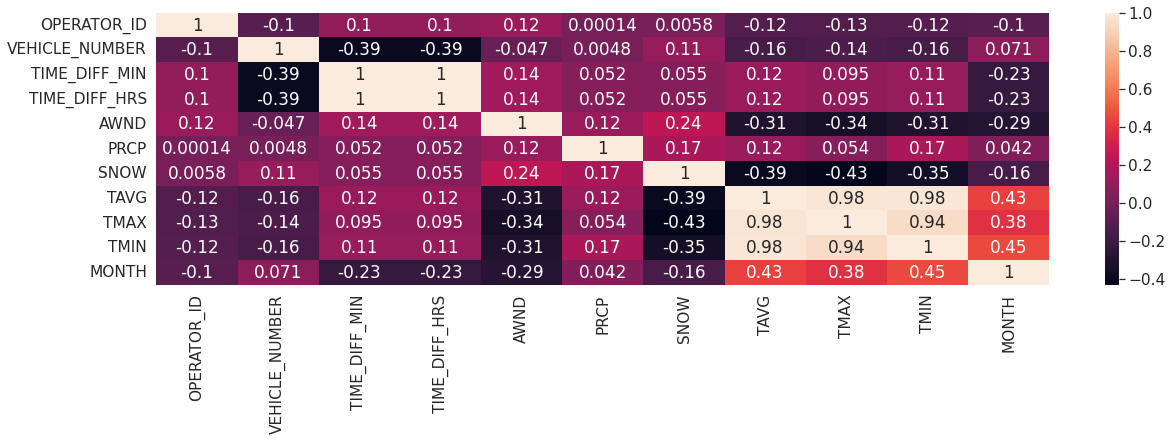

In [59]:
fig, ax = plt.subplots(figsize=(20, 5))
sns.heatmap(weatherdelay.corr(),annot=True)

### SUBTASK 4.2

Grouped the dataset on Operator ID to check if any particular Operator is repeatedly causing delay

In [60]:
delayByOperator = pd.DataFrame(weatherdelay.groupby(['OPERATOR_ID',])['TIME_DIFF_HRS'].count().reset_index())
delayByOperator.columns = ['OPERATOR_ID', 'Count']
delayByOperator = delayByOperator.sort_values(by=['Count'],ascending = False).head(5)
delayByOperator

,OPERATOR_ID,Count
4,2317,78
17,8078,28
24,8918,22
30,9221,14
18,8241,14


From the above result we can see that Operator 4 has the highest count of being delyaed. Then calculated probability of him/her being delayed which comes around approx 38%.

In [61]:
# Operator 2317 has the highest count of delaying and the probability is almost 38%
len_of_data = len(weatherdelay)
78/len_of_data*100

37.5

Text(0, 0.5, 'Count of Delayed service')

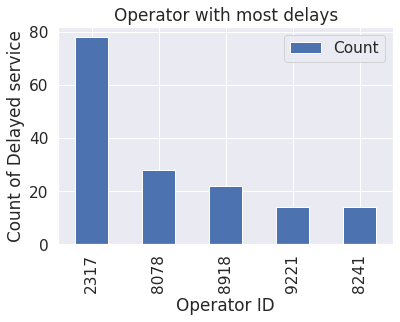

In [62]:
delayByOperator.reset_index().plot(
    x="OPERATOR_ID", y="Count", kind="bar"
)
plt.title("Operator with most delays")
plt.xlabel("Operator ID")
plt.ylabel("Count of Delayed service")

## TASK 2

Created new dataset with required columns and then chnaged the datatype of datetime coulm to do datetime operations.
Then grouped the data to find passengers boarding from various stops weekly

In [63]:
newdata2019['TRIP_DATE'] = pd.to_datetime(newdata2019['TRIP_START_TIME']).dt.date
newdata2020['TRIP_DATE'] = pd.to_datetime(newdata2020['TRIP_START_TIME']).dt.date

In [64]:
task22019 = newdata2019[['TRIP_START_TIME','TRIP_DATE','STOP_ID','PASSENGERS_ON','MAIN_CROSS_STREET']]

In [65]:
task22020 = newdata2020[['TRIP_START_TIME','TRIP_DATE','STOP_ID','PASSENGERS_ON','MAIN_CROSS_STREET']]

In [66]:
task22019['TRIP_START_TIME'] = pd.to_datetime(task22019['TRIP_START_TIME'])
task22020['TRIP_START_TIME'] = pd.to_datetime(task22020['TRIP_START_TIME'])

In [67]:
task22019['WEEK'] = task22019['TRIP_START_TIME'].dt.week
task22020['WEEK'] = task22020['TRIP_START_TIME'].dt.week

In [68]:
passperweek2019 = task22019.groupby(['STOP_ID','WEEK'], as_index = False)['PASSENGERS_ON'].sum()
passperweek2019

,STOP_ID,WEEK,PASSENGERS_ON
0,100,10,4
1,100,11,2
2,100,12,5
3,100,13,7
4,100,14,1
...,...,...,...
576,17661,28,6
577,17661,30,1
578,17661,31,1
579,17661,38,29


In [69]:
passperweek2020 = task22020.groupby(['STOP_ID','WEEK'], as_index = False)['PASSENGERS_ON'].sum()
passperweek2020

,STOP_ID,WEEK,PASSENGERS_ON
0,1114,1,90
1,1114,2,134
2,1114,3,162
3,1114,4,158
4,1114,5,147
...,...,...,...
85,12669,5,3
86,12669,6,1
87,12669,7,2
88,12669,8,1
